In [5]:
# Packages for training the model and working with the dataset.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import json
# Utility/helper packages.
import platform
import time
import pathlib
import os

In [6]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.13
Tensorflow version: 2.8.0
Keras version: 2.8.0


In [7]:
dataset_raw = []

In [8]:
with open('quotes.json') as dataset_file:
            json_data_dict = json.load(dataset_file)
            # dict_keys = [key for key in json_data_dict[0]]
            # dict_keys.sort()
            dataset_raw += json_data_dict

In [9]:
def validate_text_field(quote):
    required_keys = ['text']
    
    if not quote:
        return False
    
    for required_key in required_keys:
        if not quote[required_key]:
            return False
        
        # if type(quote[required_key]) == list and len(quote[required_key]) == 0:
        #     return False
    
    return True

In [10]:
dataset_validated = [quote for quote in dataset_raw if validate_text_field(quote)]
print('Dataset size BEFORE validation', len(dataset_raw))
print('Dataset size AFTER validation', len(dataset_validated))
print('Number of incomplete quotes', len(dataset_raw) - len(dataset_validated))

Dataset size BEFORE validation 1621
Dataset size AFTER validation 1621
Number of incomplete recipes 0


In [11]:
STOP_WORD_QUOTE = '💭 '
STOP_WORD_AUTHOR = '\n👨\n\n'

In [12]:
def quote_to_string(quote):

    text = quote['text']
    author = quote['author']
    
    return f'{STOP_WORD_QUOTE}{text}\n{STOP_WORD_AUTHOR}{author}'

In [13]:
dataset_stringified = [quote_to_string(quote) for quote in dataset_validated]
print('Stringified dataset size: ', len(dataset_stringified))

Stringified dataset size:  1621


In [14]:
for quote_index, quote_string  in enumerate(dataset_stringified[500:503]):
    print('Quote #{}\n---------'.format(quote_index + 1))
    print(quote_string)
    print('\n')

Quote #1
---------
💭 Gratitude is riches. Complaint is poverty.

👨

Doris Day


Quote #2
---------
💭 Until you make peace with who you are, you will never be content with what you have.

👨

Doris Mortman


Quote #3
---------
💭 Until you make peace with who you are, you'll never be content with what you have.

👨

Doris Mortman




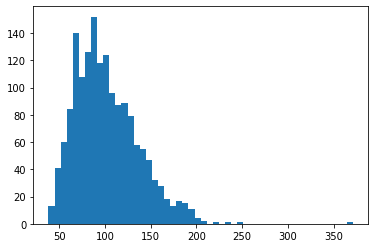

In [15]:
quote_lengths = []
for quote_text in dataset_stringified:
    quote_lengths.append(len(quote_text))
plt.hist(quote_lengths, bins=50)
plt.show()

In [16]:
max(quote_lengths)

371

In [17]:
MAX_QUOTE_LENGTH = 250

In [18]:
def filter_quotes_by_length(quote_test):
    return len(quote_test) <= MAX_QUOTE_LENGTH 

dataset_filtered = [quote_text for quote_text in dataset_stringified if filter_quotes_by_length(quote_text)]
print('Dataset size BEFORE filtering: ', len(dataset_stringified))
print('Dataset size AFTER filtering: ', len(dataset_filtered))
print('Number of eliminated quotes: ', len(dataset_stringified) - len(dataset_filtered))

Dataset size BEFORE filtering:  1621
Dataset size AFTER filtering:  1620
Number of eliminated recipes:  1


In [19]:
TOTAL_QUOTES_NUM = len(dataset_filtered)
TOTAL_QUOTES_NUM

1620

## Creating Vocabulary

In [20]:
STOP_SIGN = '␣'
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    char_level=True,
    filters='',
    lower=False,
    split=''
)
# Stop word is not a part of quotes, but tokenizer must know about it as well.
tokenizer.fit_on_texts([STOP_SIGN])
tokenizer.fit_on_texts(dataset_filtered)
tokenizer.get_config()

{'char_level': True,
 'document_count': 1621,
 'filters': '',
 'index_docs': '{"1": 1620, "71": 1, "11": 1563, "8": 1579, "10": 1620, "24": 1620, "14": 1359, "26": 891, "17": 1227, "20": 1165, "25": 1620, "5": 1600, "16": 1277, "33": 343, "4": 1606, "7": 1599, "21": 1589, "6": 1604, "12": 1491, "19": 1175, "9": 1584, "34": 272, "13": 1441, "3": 1615, "23": 1008, "2": 1618, "27": 698, "30": 314, "44": 163, "15": 1259, "22": 1023, "18": 1222, "28": 679, "49": 115, "39": 228, "47": 144, "31": 356, "38": 175, "29": 548, "51": 108, "36": 233, "32": 368, "46": 150, "52": 100, "37": 237, "53": 94, "50": 119, "55": 68, "48": 124, "41": 219, "43": 192, "35": 242, "40": 222, "42": 212, "56": 54, "58": 35, "54": 87, "66": 2, "45": 165, "59": 23, "62": 10, "68": 1, "67": 2, "63": 2, "72": 1, "57": 37, "61": 12, "73": 1, "65": 3, "64": 4, "60": 10, "74": 1, "69": 2, "70": 2}',
 'index_word': '{"1": " ", "2": "e", "3": "o", "4": "t", "5": "a", "6": "n", "7": "i", "8": "s", "9": "r", "10": "\\n", "11

In [21]:
VOCABULARY_SIZE = len(tokenizer.word_counts) + 1
print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

VOCABULARY_SIZE:  75


In [22]:
array_vocabulary = tokenizer.sequences_to_texts([[word_index] for word_index in range(VOCABULARY_SIZE)])
print([char for char in array_vocabulary])

['', ' ', 'e', 'o', 't', 'a', 'n', 'i', 's', 'r', '\n', 'h', 'l', 'u', 'd', 'y', 'c', 'm', 'w', 'f', 'g', '.', 'p', 'b', '💭', '👨', 'v', ',', 'k', 'T', 'I', 'W', 'B', 'A', 'L', 'S', 'C', 'E', "'", 'M', 'D', 'R', 'H', 'P', 'x', 'J', 'N', 'G', 'z', 'Y', 'F', ';', 'j', 'O', 'K', 'q', '-', 'V', ':', '?', 'Z', 'U', '!', '0', '’', 'Q', 'é', '1', '%', 'ø', '—', '␣', '9', 'ö', 'X']


In [23]:
dataset_vectorized = tokenizer.texts_to_sequences(dataset_filtered)
print('Vectorized dataset size:', len(dataset_vectorized))

Vectorized dataset size: 1620


In [24]:
print(dataset_vectorized[0][:10], '...')

[24, 1, 33, 1, 11, 3, 13, 8, 2, 1] ...


In [25]:
def quote_sequence_to_string(quote_sequence):
    quote_stringified = tokenizer.sequences_to_texts([quote_sequence])[0]
    print(quote_stringified)
quote_sequence_to_string(dataset_vectorized[0])

💭   A   h o u s e   d i v i d e d   a g a i n s t   i t s e l f   c a n n o t   s t a n d . 
 
 👨 
 
 A b r a h a m   L i n c o l n


In [26]:
for quote_index, quote in enumerate(dataset_vectorized[:10]):
    print('Quote #{} length: {}'.format(quote_index + 1, len(quote)))

Recipe #1 length: 66
Recipe #2 length: 72
Recipe #3 length: 71
Recipe #4 length: 94
Recipe #5 length: 86
Recipe #6 length: 86
Recipe #7 length: 111
Recipe #8 length: 124
Recipe #9 length: 94
Recipe #10 length: 139


In [27]:
dataset_vectorized_padded_without_stops = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized,
    padding='post',
    truncating='post',
    # We use -1 here and +1 in the next step to make sure
    # that all quotes will have at least 1 stops sign at the end,
    # since each sequence will be shifted and truncated afterwards
    # (to generate X and Y sequences).
    maxlen=MAX_QUOTE_LENGTH-1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)
dataset_vectorized_padded = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized_padded_without_stops,
    padding='post',
    truncating='post',
    maxlen=MAX_QUOTE_LENGTH+1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)
for quote_index, quote in enumerate(dataset_vectorized_padded[:10]):
    print('Quote #{} length: {}'.format(quote_index, len(quote)))

Quote #0 length: 251
Quote #1 length: 251
Quote #2 length: 251
Quote #3 length: 251
Quote #4 length: 251
Quote #5 length: 251
Quote #6 length: 251
Quote #7 length: 251
Quote #8 length: 251
Quote #9 length: 251


In [28]:
quote_sequence_to_string(dataset_vectorized_padded[0])

💭   A   h o u s e   d i v i d e d   a g a i n s t   i t s e l f   c a n n o t   s t a n d . 
 
 👨 
 
 A b r a h a m   L i n c o l n ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣


## Create TensorFlow dataset

In [29]:
dataset = tf.data.Dataset.from_tensor_slices(dataset_vectorized_padded)
print(dataset)

<TensorSliceDataset element_spec=TensorSpec(shape=(251,), dtype=tf.int32, name=None)>


In [30]:
for quote in dataset.take(1):
    print('Raw quote:\n', quote.numpy(), '\n\n\n')
    print('Stringified quote:\n')
    quote_sequence_to_string(quote.numpy())

Raw recipe:
 [24  1 33  1 11  3 13  8  2  1 14  7 26  7 14  2 14  1  5 20  5  7  6  8
  4  1  7  4  8  2 12 19  1 16  5  6  6  3  4  1  8  4  5  6 14 21 10 10
 25 10 10 33 23  9  5 11  5 17  1 34  7  6 16  3 12  6 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71
 71 71 71 71 71 71 71 71 71 71 71] 



Stringified recipe:

💭   A   h o u s e   d i v i d e d   a g a i n s t   i t s e l f   c a n n o t   s t a n d . 
 
 👨 
 
 A b r a h a m   L i n c o l n ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣

## Split examples on input and target texts

In [31]:
def split_input_target(quote):
    input_text = quote[:-1]
    target_text = quote[1:]
    
    return input_text, target_text
dataset_targeted = dataset.map(split_input_target)
print(dataset_targeted)

<MapDataset element_spec=(TensorSpec(shape=(250,), dtype=tf.int32, name=None), TensorSpec(shape=(250,), dtype=tf.int32, name=None))>


In [32]:
for input_example, target_example in dataset_targeted.take(1):
    print('Input sequence size:', repr(len(input_example.numpy())))
    print('Target sequence size:', repr(len(target_example.numpy())))
    print()
    
    input_stringified = tokenizer.sequences_to_texts([input_example.numpy()[:50]])[0]
    target_stringified = tokenizer.sequences_to_texts([target_example.numpy()[:50]])[0]
    
    print('Input:  ', repr(''.join(input_stringified)))
    print('Target: ', repr(''.join(target_stringified)))


Input sequence size: 250
Target sequence size: 250

Input:   '💭   A   h o u s e   d i v i d e d   a g a i n s t   i t s e l f   c a n n o t   s t a n d . \n \n 👨 \n'
Target:  '  A   h o u s e   d i v i d e d   a g a i n s t   i t s e l f   c a n n o t   s t a n d . \n \n 👨 \n \n'


In [33]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:10], target_example[:10])):
    print('Step {:2d}'.format(i + 1))
    print('  input: {} ({:s})'.format(input_idx, repr(tokenizer.sequences_to_texts([[input_idx.numpy()]])[0])))
    print('  expected output: {} ({:s})'.format(target_idx, repr(tokenizer.sequences_to_texts([[target_idx.numpy()]])[0])))

Step  1
  input: 24 ('💭')
  expected output: 1 (' ')
Step  2
  input: 1 (' ')
  expected output: 33 ('A')
Step  3
  input: 33 ('A')
  expected output: 1 (' ')
Step  4
  input: 1 (' ')
  expected output: 11 ('h')
Step  5
  input: 11 ('h')
  expected output: 3 ('o')
Step  6
  input: 3 ('o')
  expected output: 13 ('u')
Step  7
  input: 13 ('u')
  expected output: 8 ('s')
Step  8
  input: 8 ('s')
  expected output: 2 ('e')
Step  9
  input: 2 ('e')
  expected output: 1 (' ')
Step 10
  input: 1 (' ')
  expected output: 14 ('d')


In [34]:
print(dataset_targeted)

<MapDataset element_spec=(TensorSpec(shape=(250,), dtype=tf.int32, name=None), TensorSpec(shape=(250,), dtype=tf.int32, name=None))>


In [35]:
print('TOTAL_QUOTES_NUM: ', TOTAL_QUOTES_NUM)
print('MAX_QUOTE_LENGTH: ', MAX_QUOTE_LENGTH)
print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

TOTAL_QUOTES_NUM:  1620
MAX_QUOTE_LENGTH:  250
VOCABULARY_SIZE:  75


In [36]:
# Batch size.
BATCH_SIZE = 64
# Buffer size to shuffle the dataset (TF data is designed to work
# with possibly infinite sequences, so it doesn't attempt to shuffle
# the entire sequence in memory. Instead, it maintains a buffer in
# which it shuffles elements).
SHUFFLE_BUFFER_SIZE = 1000
dataset_train = dataset_targeted.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).repeat()
  # Shuffling examples first.
  # Splitting examples on batches.
  # Making a dataset to be repeatable (it will never ends). 

print(dataset_train)

<RepeatDataset element_spec=(TensorSpec(shape=(64, 250), dtype=tf.int32, name=None), TensorSpec(shape=(64, 250), dtype=tf.int32, name=None))>


In [37]:
for input_text, target_text in dataset_train.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[24  1 34 ... 71 71 71]
 [24  1 32 ... 71 71 71]
 [24  1 49 ... 71 71 71]
 ...
 [24  1 29 ... 71 71 71]
 [24  1 33 ... 71 71 71]
 [24  1 47 ... 71 71 71]], shape=(64, 250), dtype=int32)

1st batch: target_text: tf.Tensor(
[[ 1 34  7 ... 71 71 71]
 [ 1 32  2 ... 71 71 71]
 [ 1 49  2 ... 71 71 71]
 ...
 [ 1 29 11 ... 71 71 71]
 [ 1 33  1 ... 71 71 71]
 [ 1 47  2 ... 71 71 71]], shape=(64, 250), dtype=int32)


## Build the model

In [38]:
tmp_vocab_size = 10
tmp_embedding_size = 5
tmp_input_length = 8
tmp_batch_size = 2
tmp_model = tf.keras.models.Sequential()
tmp_model.add(tf.keras.layers.Embedding(
  input_dim=tmp_vocab_size,
  output_dim=tmp_embedding_size,
  input_length=tmp_input_length
))
# The model will take as input an integer matrix of size (batch, input_length).
# The largest integer (i.e. word index) in the input should be no larger than 9 (tmp_vocab_size).
# Now model.output_shape == (None, 10, 64), where None is the batch dimension.
tmp_input_array = np.random.randint(
  low=0,
  high=tmp_vocab_size,
  size=(tmp_batch_size, tmp_input_length)
)
tmp_model.compile('rmsprop', 'mse')
tmp_output_array = tmp_model.predict(tmp_input_array)
print('tmp_input_array shape:', tmp_input_array.shape)
print('tmp_input_array:')
print(tmp_input_array)
print()
print('tmp_output_array shape:', tmp_output_array.shape)
print('tmp_output_array:')
print(tmp_output_array)

tmp_input_array shape: (2, 8)
tmp_input_array:
[[8 1 4 9 6 5 1 8]
 [8 6 2 2 1 1 3 7]]

tmp_output_array shape: (2, 8, 5)
tmp_output_array:
[[[ 0.02609203 -0.02245727 -0.01297919  0.02449424  0.00370511]
  [-0.03016865 -0.03976301  0.02947002  0.04332835 -0.02120524]
  [ 0.02170826  0.02719119 -0.02625141  0.03596428  0.04536157]
  [-0.02967047  0.01724008 -0.0105393  -0.04624162 -0.04447546]
  [ 0.03648655 -0.03294297 -0.00662162  0.00723673  0.03492509]
  [ 0.0301838   0.02577679  0.01921814  0.01624999 -0.03399091]
  [-0.03016865 -0.03976301  0.02947002  0.04332835 -0.02120524]
  [ 0.02609203 -0.02245727 -0.01297919  0.02449424  0.00370511]]

 [[ 0.02609203 -0.02245727 -0.01297919  0.02449424  0.00370511]
  [ 0.03648655 -0.03294297 -0.00662162  0.00723673  0.03492509]
  [ 0.03673912 -0.00766529 -0.00791442 -0.02688416  0.01532226]
  [ 0.03673912 -0.00766529 -0.00791442 -0.02688416  0.01532226]
  [-0.03016865 -0.03976301  0.02947002  0.04332835 -0.02120524]
  [-0.03016865 -0.03976301 

In [39]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        batch_input_shape=[batch_size, None]
    ))
    model.add(tf.keras.layers.LSTM(
        units=rnn_units,
        return_sequences=True,
        stateful=True,
        recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))
    model.add(tf.keras.layers.Dense(vocab_size))
    
    return model
model = build_model(
  vocab_size=VOCABULARY_SIZE,
  embedding_dim=256,
  rnn_units=1024,
  batch_size=BATCH_SIZE
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (64, None, 256)           19200     
                                                                 
 lstm (LSTM)                 (64, None, 1024)          5246976   
                                                                 
 dense (Dense)               (64, None, 75)            76875     
                                                                 
Total params: 5,343,051
Trainable params: 5,343,051
Non-trainable params: 0
_________________________________________________________________


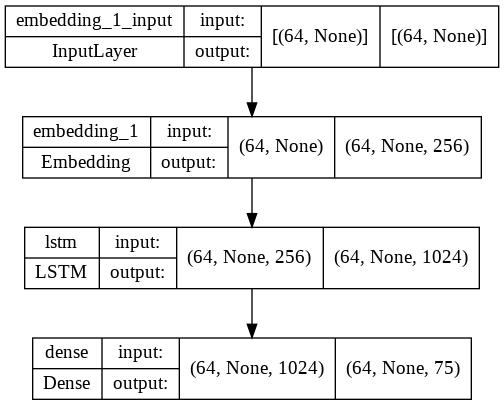

In [40]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    to_file='model.png'
)

## Model before training

In [41]:
for input_example_batch, target_example_batch in dataset_train.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 250, 75) # (batch_size, sequence_length, vocab_size)


In [42]:
print('Prediction for the 1st letter of the batch 1st sequense:')
print(example_batch_predictions[0, 0])

Prediction for the 1st letter of the batch 1st sequense:
tf.Tensor(
[-1.5543542e-03  5.0417087e-03  2.8174131e-03 -2.6548372e-03
 -2.0677381e-04 -4.1849678e-04 -3.0263176e-04 -1.9391066e-03
 -3.2386517e-03  7.7128094e-03  6.4729978e-03  1.3524808e-03
  7.1225972e-03  2.4798224e-03 -3.4788577e-03  1.2206610e-03
 -5.6930128e-03  1.2243225e-03 -2.5324025e-03 -3.2333571e-03
 -3.3903043e-03  1.1360515e-03  3.7958045e-03  3.5631307e-04
 -6.2444680e-03  3.6041038e-03 -1.0697916e-03  1.4418061e-04
 -7.1635959e-04  5.5000661e-03 -3.6964221e-03  4.3248473e-04
 -1.5145499e-03 -1.4016428e-03 -1.8003533e-03  6.8406295e-04
  6.7064837e-03  8.2522500e-05  5.9809227e-04  2.2001448e-05
 -2.9975220e-03 -4.6844021e-03 -1.7295807e-03  4.9491861e-04
 -7.2788354e-03  3.5364563e-03 -7.9365738e-04 -9.2136906e-06
  3.0648196e-05  5.8706235e-03  1.5348875e-03  1.5760912e-03
 -1.9795264e-03  3.9054072e-03 -3.5469010e-03 -8.0880942e-05
 -2.7281777e-03  2.6312750e-03 -8.0344261e-04 -4.8747915e-03
  2.7614222e-03 -

In [43]:
# logits is 2-D Tensor with shape [batch_size, num_classes].
# Each slice [i, :] represents the unnormalized log-probabilities for all classes.
# In the example below we say that the probability for class "0"
# (element with index 0) is low but the probability for class "2" is much higher.
tmp_logits = [
  [-0.95, 0, 0.95],
];
# Let's generate 5 samples. Each sample is a class index. Class probabilities 
# are being taken into account (we expect to see more samples of class "2").
tmp_samples = tf.random.categorical(
    logits=tmp_logits,
    num_samples=5
)
print(tmp_samples)

tf.Tensor([[2 2 1 2 1]], shape=(1, 5), dtype=int64)


In [44]:
sampled_indices = tf.random.categorical(
    logits=example_batch_predictions[0],
    num_samples=1
)
sampled_indices = tf.squeeze(
    input=sampled_indices,
    axis=-1
).numpy()
sampled_indices.shape

(250,)

In [45]:
sampled_indices[:100]

array([14, 49, 18, 58, 21, 46, 27, 63,  0, 63, 50, 53, 66, 31,  9, 29, 35,
       12, 53, 21, 72, 66, 70, 46, 66, 66, 27, 18, 29, 20, 27, 50, 13, 42,
        3,  2, 52, 24, 49, 73, 28, 56, 52, 25, 64, 10,  9, 48, 15, 74, 57,
       44, 61,  8, 49, 38, 33, 40, 56, 70, 37,  3, 23, 43, 42,  1, 10, 58,
       27, 31, 25, 10, 64, 10, 62, 41, 51, 25,  0, 55, 15, 14, 51, 66,  3,
       17,  4, 38, 51,  1,  1, 64, 67, 66,  4, 74, 52,  7, 70,  8])

In [46]:
print('Input:\n', repr(''.join(tokenizer.sequences_to_texts([input_example_batch[0].numpy()[:50]]))))
print()
print('Next char prediction:\n', repr(''.join(tokenizer.sequences_to_texts([sampled_indices[:50]]))))

Input:
 '💭   A n   o u n c e   o f   e m o t i o n   i s   e q u a l   t o   a   t o n   o f   f a c t s . \n'

Next char prediction:
 'd Y w : . N , 0 0 F O é W r T S l O . 9 é — N é é , w T g , F u H o e j 💭 Y ö k - j 👨 ’ \n r z y X'


## Train the model

In [47]:
# An objective function.
# The function is any callable with the signature scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    entropy = tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )
    
    return entropy
example_batch_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("scalar_loss.shape:      ", example_batch_loss.shape)
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (64, 250, 75)  # (batch_size, sequence_length, vocab_size)
scalar_loss.shape:       (64, 250)
scalar_loss:       4.3185334


In [48]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

In [49]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='loss',
    restore_best_weights=True,
    verbose=1
)

In [50]:
# Create a checkpoints directory.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

In [53]:
EPOCHS = 20
INITIAL_EPOCH = 1
STEPS_PER_EPOCH = 500
print('EPOCHS:          ', EPOCHS)
print('INITIAL_EPOCH:   ', INITIAL_EPOCH)
print('STEPS_PER_EPOCH: ', STEPS_PER_EPOCH)

EPOCHS:           20
INITIAL_EPOCH:    1
STEPS_PER_EPOCH:  500


In [ ]:
history = model.fit(
    x=dataset_train,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    callbacks=[
        checkpoint_callback,
        early_stopping_callback
    ]
)
# Saving the trained model to file (to be able to re-use it later).
model_name = 'quote_generation_rnn_raw.h5'
model.save(model_name, save_format='h5')

Epoch 1/20
 23/500 [>.............................] - ETA: 2:34:16 - loss: 1.3263

## Visualize Training process

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()
render_training_history(history)

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

In [ ]:
simplified_batch_size = 1
model_simplified = model = build_model(
  vocab_size=VOCABULARY_SIZE,
  embedding_dim=256,
  rnn_units=1024,
  batch_size=simplified_batch_size
)
model_simplified.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model_simplified.build(tf.TensorShape([simplified_batch_size, None]))
model_simplified.summary()

In [ ]:
model_simplified.input_shape

## Generate Text

In [ ]:
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
    # Evaluation step (generating text using the learned model)
    
    padded_start_string = STOP_WORD_QUOTE + start_string
    # Converting our start string to numbers (vectorizing).
    input_indices = np.array(tokenizer.texts_to_sequences([padded_start_string]))
    # Empty string to store our results.
    text_generated = []
    # Here batch size == 1.
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)
        # Using a categorical distribution to predict the character returned by the model.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
            predictions,
            num_samples=1
        )[-1, 0].numpy()
        # We pass the predicted character as the next input to the model
        # along with the previous hidden state.
        input_indices = tf.expand_dims([predicted_id], 0)
        
        next_character = tokenizer.sequences_to_texts(input_indices.numpy())[0]
        text_generated.append(next_character)
    return (padded_start_string + ''.join(text_generated))

In [ ]:
def generate_combinations(model):
    quote_length = 1000
    try_letters = ['', '\n', 'A', 'B', 'C', 'O', 'L', 'Mushroom', 'Apple', 'Slow', 'Christmass', 'The', 'Banana', 'Homemade']
    try_temperature = [1.0, 0.8, 0.4, 0.2]
    for letter in try_letters:
        for temperature in try_temperature:
            generated_text = generate_text(
                model,
                start_string=letter,
                num_generate = quote_length,
                temperature=temperature
            )
            print(f'Attempt: "{letter}" + {temperature}')
            print('-----------------------------------')
            print(generated_text)
            print('\n\n')